In [ ]:
from google.colab import drive # Mount my google drive diretory
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os # Change directory to CS284 folder in google drive
os.chdir("gdrive/MyDrive/CS284/Activity_4")

In [ ]:
!pwd

/content/gdrive/MyDrive/CS284/Activity_4


In [ ]:
!ls

'Another copy of Googlenet(1).ipynb'		        Googlenet.ipynb
'Another copy of Googlenet.ipynb'		        models
'Copy of Copy_of_Yet_another_copy_of_Googlenet.ipynb'   test_tensor_save.txt
'Copy of Googlenet.ipynb'			        Untitled0.ipynb
 Copy_of_Yet_another_copy_of_Googlenet.ipynb	       'Yet another copy of Googlenet (2).ipynb'
 dataset					       'Yet another copy of Googlenet.ipynb'


In [ ]:
!pip install -q torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 16.0 MB/s eta 0:00:00


In [ ]:
# Dataset initial preparation
import pickle
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

# Specify the path to the directory containing CIFAR-10 files
cifar_folder = 'dataset'

# Load the training data batches
train_data = []
train_labels = []
for batch_id in range(1, 6):  # CIFAR-10 consists of 5 batches for training
    batch_file = f'{cifar_folder}/data_batch_{batch_id}'
    batch_data = unpickle(batch_file)
    train_data.append(batch_data[b'data'])
    train_labels.extend(batch_data[b'labels'])

# Load the test data batch
test_batch_file = f'{cifar_folder}/test_batch'
test_batch = unpickle(test_batch_file)
test_data = test_batch[b'data']
test_labels = test_batch[b'labels']

# Convert data to numpy arrays and reshape for images
train_data = np.concatenate(train_data, axis=0).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Displaying the shapes of loaded data
print("Training data shape:", train_data.shape)
print("Training labels length:", len(train_labels))
print("Test data shape:", test_data.shape)
print("Test labels length:", len(test_labels))

Training data shape: (50000, 32, 32, 3)
Training labels length: 50000
Test data shape: (10000, 32, 32, 3)
Test labels length: 10000


In [ ]:
#train_data_cropped[0].shape

In [ ]:
# Dataset Pre-processing as done in the paper

# Crop function
def crop(image_array):

  height,width=image_array.shape[:2]

  left=2
  top=2
  right=30
  bottom=30

  cropped_image=image_array[top:bottom,left:right]

  return cropped_image


# Divide the datasets by 255
train_data=train_data/255
test_data=test_data/255
# Initialization list for cropped training and testing dataset
train_data_cropped=[]
test_data_cropped= []
# Cropping of training dataset
for i in range(0,50000):
  train_data_cropped.append(crop(train_data[i]))
#Cropping of testing dataset
for i in range(0,10000):
  test_data_cropped.append(crop(test_data[i]))
# Turn dataset into numpy arrays
train_data_cropped=np.array(train_data_cropped)
test_data_cropped=np.array(test_data_cropped)
train_data_cropped.shape, test_data_cropped.shape




# Displaying the shapes of cropped data
print("Training data shape:", train_data_cropped.shape)
print("Training labels length:", len(train_labels))
print("Test data shape:", test_data_cropped.shape)
print("Test labels length:", len(test_labels))

Training data shape: (50000, 28, 28, 3)
Training labels length: 50000
Test data shape: (10000, 28, 28, 3)
Test labels length: 10000


In [ ]:

train_data_cropped_processed = []
test_data_cropped_processed = []

# Iterate through the range (0, 50000)
train_data_cropped_processed = []

for i in range(0, 50000):
    mean = np.mean(train_data_cropped[i], axis=(0, 1),keepdims=True)
    std_dev = np.std(train_data_cropped[i], axis=(0, 1),keepdims=True)

    processed_data = (train_data_cropped[i] - mean) / (std_dev+ 1e-6)
    train_data_cropped_processed.append(processed_data)

for i in range(0, 10000):
    mean = np.mean(test_data_cropped[i], axis=(0, 1),keepdims=True)
    std_dev = np.std(test_data_cropped[i], axis=(0, 1),keepdims=True)


    processed_data = (test_data_cropped[i] - mean) / (std_dev+ 1e-6)
    test_data_cropped_processed.append(processed_data)

train_data_cropped_processed=np.array(train_data_cropped_processed)
test_data_cropped_processed=np.array(test_data_cropped_processed)

# Displaying the shapes of cropped and then processed data data
print("Training data shape:", train_data_cropped_processed.shape)
print("Training labels length:", len(train_labels))
print("Test data shape:", test_data_cropped_processed.shape)
print("Test labels length:", len(test_labels))

Training data shape: (50000, 28, 28, 3)
Training labels length: 50000
Test data shape: (10000, 28, 28, 3)
Test labels length: 10000


In [ ]:
train_data_cropped_processed[0].shape

(28, 28, 3)

In [ ]:
# Change shape of the dataset to batch size, channel, height, width
train_data_cropped1=np.transpose(train_data_cropped_processed,(0,3,1,2))
test_data_cropped1=np.transpose(test_data_cropped_processed,(0,3,1,2))

# Displaying the shapes of cropped and permuted data
print("Training data shape:", train_data_cropped1.shape)
print("Training labels length:", len(train_labels))
print("Test data shape:", test_data_cropped1.shape)
print("Test labels length:", len(test_labels))

Training data shape: (50000, 3, 28, 28)
Training labels length: 50000
Test data shape: (10000, 3, 28, 28)
Test labels length: 10000


In [ ]:
train_data_cropped1[0]

array([[[-2.37350341, -1.52465447, -0.85056855, ..., -0.0516519 ,
         -0.35124564, -0.65083939],
        [-1.42478989, -0.95043313, -0.72573782, ..., -0.22641492,
         -0.35124564, -0.47607637],
        [-1.05029771, -0.42614408, -0.50104251, ..., -0.62587324,
         -1.02533157, -1.42478989],
        ...,
        [ 0.59746788,  0.17304341, -0.3262795 , ..., -0.02668575,
          1.47128297,  1.5461814 ],
        [ 1.0468585 ,  0.69733246,  0.29787414, ..., -0.75070397,
          1.0468585 ,  0.72229861],
        [ 1.34645224,  1.17168922,  0.97196006, ..., -2.34853727,
         -0.17648262,  0.39773872]],

       [[-1.8362012 , -1.30978733, -0.80626101, ..., -0.05097153,
         -0.30273469, -0.53161029],
        [-1.21823709, -1.01224905, -0.85203613, ..., -0.32562225,
         -0.39428493, -0.46294761],
        [-0.96647393, -0.64604809, -0.69182321, ..., -0.64604809,
         -0.92069881, -1.14957441],
        ...,
        [ 0.33811699,  0.08635383, -0.44006005, ..., -

<function matplotlib.pyplot.show(close=None, block=None)>

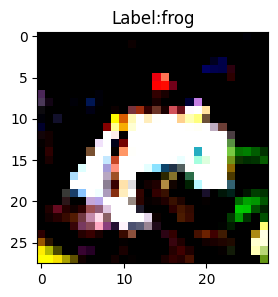

In [ ]:
#Visualization of random dataset and labels for checking

import matplotlib.pyplot as plt
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

image=train_data_cropped_processed[0]
label=classes[train_labels[0]]
image,label

plt.figure(figsize=(3,3))
plt.imshow(image)
plt.title(f'Label:{label}')
#plt.axis('off')
plt.show


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
# Function combining image and labels by inheriting Dataset
class CombineImageandLabels(Dataset):
  def __init__(self,data,labels,transforms=None):
    self.data=data
    self.labels=labels
    self.transforms = transforms

  def __len__(self):
    return len(self.data)

  def __getitem__(self,idx):
    image=self.data[idx]
    label=self.labels[idx]

    if self.transforms is not None:
      image = self.transforms(image)


    return image,label


In [ ]:
train_labels=np.array(train_labels)
# Create Dataset
cifar10_train_data=CombineImageandLabels(train_data_cropped1,train_labels)
cifar10_test_data=CombineImageandLabels(test_data_cropped1,test_labels)

In [ ]:

# Create DataLoader

train_batch_size=16
train_data_loader=torch.utils.data.DataLoader(cifar10_train_data,batch_size=train_batch_size,shuffle=True,num_workers=4)
test_data_loader=torch.utils.data.DataLoader(cifar10_test_data,batch_size=train_batch_size,shuffle=False,num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Preparation of Different modules used for the Network
from torch import nn

# Convolution Module
class ConvModule(nn.Module):
  def __init__ (self,filter,stride,in_channel,out_channel,padding=0):
    super(). __init__()
    self.filter=filter
    self.stride=stride
    self.in_channel=in_channel
    self.out_channel=out_channel
    self.padding=padding

    self.conv=nn.Conv2d(in_channels=in_channel,out_channels=out_channel,kernel_size=filter,stride=stride,padding=padding)
    self.bn=nn.BatchNorm2d(out_channel)
    self.relu=nn.ReLU()


  def forward(self,x):
    x=self.conv(x)
    x=self.bn(x)
    x=self.relu(x)

    return x
#Inception Module
class InceptionModule(nn.Module):
  def __init__(self,input_channel,output_channel1,output_channel2):
    super(). __init__()
    self.input_channel=input_channel
    self.output_channel1=output_channel1
    self.output_channel2=output_channel2

    self.conv1=ConvModule(in_channel=input_channel,out_channel=output_channel1,filter=1,stride=1)
    self.conv2=ConvModule(in_channel=input_channel,out_channel=output_channel2,filter=3,stride=1,padding=1)#padding of 1 is added so that the size of the output channels will be the same

  def forward(self,x):
    x1=self.conv1(x)
    x2=self.conv2(x)
    concat_x=torch.cat((x2,x1),dim=1)

    return concat_x

#Downsample Module
class Downsample(nn.Module):
  def __init__(self,input_channel,output_channel1):
    super(). __init__()
    self.input_channel=input_channel
    self.output_channel1=output_channel1


    self.conv1=ConvModule(in_channel=input_channel,out_channel=output_channel1,filter=3,stride=2)
    self.maxpool=nn.MaxPool2d(kernel_size=3,stride=2)

  def forward(self,x):
    x1=self.conv1(x)
    x2=self.maxpool(x)
    concat_x=torch.cat((x2,x1),dim=1)

    return concat_x







In [ ]:
train_data_cropped1.shape

(50000, 3, 28, 28)

In [ ]:
#Manual Model Trial for shape checking



conv_test=ConvModule(filter=3,stride=1,in_channel=3,out_channel=96) #layer1 96, Conv Module 3X3 filters
inception_test=InceptionModule(input_channel=96,output_channel1=32,output_channel2=32) #layer2 Inception Module 32+32 filters
inception_test2=InceptionModule(input_channel=64,output_channel1=32,output_channel2=48) #layer3 Inception Module 32+48 filters
downsampletest=Downsample(input_channel=80,output_channel1=80) #layer4                          Downsample 80 filters
inception_test3=InceptionModule(input_channel=160,output_channel1=112,output_channel2=48)#layer5 Inception module 112+48
inception_test4=InceptionModule(input_channel=160,output_channel1=96,output_channel2=64)#layer6  INception module 96+64
inception_test5=InceptionModule(input_channel=160,output_channel1=80,output_channel2=80)#layer7  Inception Module 80+80
inception_test6=InceptionModule(input_channel=160,output_channel1=48,output_channel2=96)#layer8  Inception Module 48+96
downsampletest1=Downsample(input_channel=144,output_channel1=96)#layer9                          Downsample Module 96
inception_test7=InceptionModule(input_channel=240,output_channel1=176,output_channel2=160) #layer10 Inception MOdule 176+160
inception_test8=InceptionModule(input_channel=336,output_channel1=176,output_channel2=160) #layer11 Inception MOdule 176+60
meanpool=nn.AvgPool2d(kernel_size=5)#layer12                                                        Meanpooling but only 5 kernels 7 is failing
linear_layer=nn.Linear(336,10) #layer13




In [ ]:
#Sample Full Network implementation



test_image=torch.from_numpy(train_data_cropped1[0]).float()
test_image=test_image.unsqueeze(0)
conv_image_test=conv_test(test_image) #layer1
inceptionimage_test=inception_test(conv_image_test) #layer2
inceptionimage_test1=inception_test2(inceptionimage_test) #layer3
downsampletestimage=downsampletest(inceptionimage_test1) #layer4
inceptionimage_test2=inception_test3(downsampletestimage)#layer5
inceptionimage_test3=inception_test4(inceptionimage_test2)#layer6
inceptionimage_test4=inception_test5(inceptionimage_test3)#layer7
inceptionimage_test5=inception_test6(inceptionimage_test4)#layer8
downsampletestimage1=downsampletest1(inceptionimage_test5)#layer9
inceptionimage_test6=inception_test7(downsampletestimage1)#layer10
inceptionimage_test7=inception_test8(inceptionimage_test6)#layer11
meanpool_testimage=meanpool(inceptionimage_test7)#layer12
flatten=meanpool_testimage.view(-1,336)#reshape for fully connected layer
linear_class=linear_layer(flatten)#layer13




In [ ]:
'''
test_image.dtype
'''

'\ntest_image.dtype\n'

In [ ]:
#Checking shape of each layer

conv_image_test.shape,inceptionimage_test.shape,inceptionimage_test1.shape,downsampletestimage.shape,inceptionimage_test2.shape,inceptionimage_test3.shape,inceptionimage_test4.shape,inceptionimage_test5.shape,downsampletestimage1.shape,inceptionimage_test6.shape,inceptionimage_test7.shape,meanpool_testimage.shape,linear_class.shape



(torch.Size([1, 96, 26, 26]),
 torch.Size([1, 64, 26, 26]),
 torch.Size([1, 80, 26, 26]),
 torch.Size([1, 160, 12, 12]),
 torch.Size([1, 160, 12, 12]),
 torch.Size([1, 160, 12, 12]),
 torch.Size([1, 160, 12, 12]),
 torch.Size([1, 144, 12, 12]),
 torch.Size([1, 240, 5, 5]),
 torch.Size([1, 336, 5, 5]),
 torch.Size([1, 336, 5, 5]),
 torch.Size([1, 336, 1, 1]),
 torch.Size([1, 10]))

In [ ]:
meanpool_testimage.shape

torch.Size([1, 336, 1, 1])

In [ ]:
# Full Network Model based on the testing above
class FullNetwork(nn.Module):
  def __init__ (self,p):
    super(). __init__()
    self.p=p #p is the probability of Dropout
    self.conv=ConvModule(filter=3,stride=1,in_channel=3,out_channel=96) #layer1 96, Conv Module 3X3 filters
    self.inception1=InceptionModule(input_channel=96,output_channel1=32,output_channel2=32) #layer2 Inception Module 32+32 filters
    self.inception2=InceptionModule(input_channel=64,output_channel1=32,output_channel2=48) #layer3 Inception Module 32+48 filters
    self.downsample1=Downsample(input_channel=80,output_channel1=80) #layer4                          Downsample 80 filters
    self.inception3=InceptionModule(input_channel=160,output_channel1=112,output_channel2=48)#layer5 Inception module 112+48
    self.inception4=InceptionModule(input_channel=160,output_channel1=96,output_channel2=64)#layer6  INception module 96+64
    self.inception5=InceptionModule(input_channel=160,output_channel1=80,output_channel2=80)#layer7  Inception Module 80+80
    self.inception6=InceptionModule(input_channel=160,output_channel1=48,output_channel2=96)#layer8  Inception Module 48+96
    self.downsample2=Downsample(input_channel=144,output_channel1=96)#layer9                          Downsample Module 96
    self.inception7=InceptionModule(input_channel=240,output_channel1=176,output_channel2=160) #layer10 Inception MOdule 176+160
    self.inception8=InceptionModule(input_channel=336,output_channel1=176,output_channel2=160) #layer11 Inception MOdule 176+160
    self.meanpool=nn.AvgPool2d(kernel_size=5)#layer12         average pooling but only kernel size of 5 error occurs when kernel size of 7
    self.linear_layer=nn.Linear(336,10) #layer13              Final linear layer
    self.dropout=nn.Dropout(p=p) # Dropout Layer


  def forward(self,x):
    x=self.conv(x)
    x=self.inception1(x)
    x=self.dropout(x)
    x=self.inception2(x)
    x=self.dropout(x)
    x=self.downsample1(x)
    x=self.inception3(x)
    x=self.dropout(x)
    x=self.inception4(x)
    x=self.dropout(x)
    x=self.inception5(x)
    x=self.dropout(x)
    x=self.inception6(x)
    x=self.dropout(x)
    x=self.downsample2(x)
    x=self.dropout(x)
    x=self.inception7(x)
    x=self.dropout(x)
    x=self.inception8(x)
    x=self.dropout(x)
    x=self.meanpool(x)
    x=x.view(-1,336)
    x=self.linear_layer(x)
    return x

In [ ]:
'''
model_nodropout=FullNetwork(p=0)
'''

'\nmodel_nodropout=FullNetwork(p=0)\n'

In [ ]:
'''
test_out=model_nodropout(test_image)
test_out.shape
'''

'\ntest_out=model_nodropout(test_image)\ntest_out.shape\n'

In [ ]:
'''
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_nodropout.parameters(),lr=0.01)
loss_fn,optimizer,device
'''

'\nimport torch\ndevice="cuda" if torch.cuda.is_available() else "cpu"\nloss_fn=nn.CrossEntropyLoss()\noptimizer=torch.optim.SGD(params=model_nodropout.parameters(),lr=0.01)\nloss_fn,optimizer,device\n'

In [ ]:
# Testing of training function before using the function
'''
model=model_nodropout
data_loader=train_data_loader

train_loss,train_acc=0,0
model.to(device)
model.train()

for batch,(X,y) in enumerate(data_loader):
  X,y=X.float().to(device),y.to(device)

  y_pred=model(X)
  loss=loss_fn(y_pred,y)
  train_loss=train_loss+loss

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

train_loss/=len(data_loader)
print(f"Train Loss:{train_loss:5f}")
'''

'\nmodel=model_nodropout\ndata_loader=train_data_loader\n\ntrain_loss,train_acc=0,0\nmodel.to(device)\nmodel.train()\n\nfor batch,(X,y) in enumerate(data_loader):\n  X,y=X.float().to(device),y.to(device)\n\n  y_pred=model(X)\n  loss=loss_fn(y_pred,y)\n  train_loss=train_loss+loss\n\n  optimizer.zero_grad()\n\n  loss.backward()\n\n  optimizer.step()\n\ntrain_loss/=len(data_loader)\nprint(f"Train Loss:{train_loss:5f}")\n'

In [ ]:
# Testing of testing function before using it as a function
'''
data_loader=test_data_loader
model=model_nodropout

test_loss,test_acc=0,0
model.to(device)
model.eval()

with torch.inference_mode():
  for X,y in data_loader:
    X,y=X.float().to(device),y.to(device)

    test_pred=model(X)

    test_loss=test_loss+loss_fn(test_pred,y)
    #test_acc=test_acc+accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

  test_loss/=len(data_loader)
  #test_acc/=len(data_loader)

  print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
  '''

'\ndata_loader=test_data_loader\nmodel=model_nodropout\n\ntest_loss,test_acc=0,0\nmodel.to(device)\nmodel.eval()\n\nwith torch.inference_mode():\n  for X,y in data_loader:\n    X,y=X.float().to(device),y.to(device)\n\n    test_pred=model(X)\n\n    test_loss=test_loss+loss_fn(test_pred,y)\n    #test_acc=test_acc+accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))\n\n  test_loss/=len(data_loader)\n  #test_acc/=len(data_loader)\n\n  print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")\n  '

In [ ]:
'''
X.dtype
'''

'\nX.dtype\n'

In [ ]:
# Function made for accuracy checking
def accuracy_fn(y_target,y_pred):

    correct = (y_target==y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [ ]:
# Sample testing of accuracy_fn function
y_target = torch.tensor([1, 0, 1, 1, 0])  # True labels
y_pred = torch.tensor([1, 1, 0, 1, 0])   # Predicted labels

accuracy = accuracy_fn(y_target, y_pred)
accuracy

60.0

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu" #device
device

'cuda'

In [ ]:
# Import time it for training time checking and printing of total time
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
## Training for Dropout=0.9


from torch.optim.lr_scheduler import LambdaLR

device="cuda" if torch.cuda.is_available() else "cpu" #device
loss_fn=nn.CrossEntropyLoss() #Loss Function


model_nodropout1=FullNetwork(p=0.9) # Network instantiation
optimizer1=torch.optim.SGD(params=model_nodropout1.parameters(),lr=0.01) #Optimizer
lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer1,
                                               start_factor=1.0,end_factor=0.3,total_iters=80) #scheduler

def training(model:torch.nn.Module,data_loader:DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer, accuracy_fn,device:torch.device=device):
  train_loss,train_acc=0,0
  model.to(device)
  model.train()

  for batch,(X,y) in enumerate(data_loader):
    X,y=X.float().to(device),y.to(device)

    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss=train_loss+loss
    train_acc=train_acc+accuracy_fn(y_target=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    lr_scheduler.step()

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train Loss:{train_loss:5f}|Train Acc:{train_acc:5f}%")
  return train_loss,train_acc


def testing(data_loader:DataLoader,model:torch.nn.Module,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
  test_loss,test_acc=0,0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.float().to(device),y.to(device)

      test_pred=model(X)

      test_loss=test_loss+loss_fn(test_pred,y)
      test_acc=test_acc+accuracy_fn(y_target=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

    return test_loss,test_acc


#Training Loop

from tqdm.auto import tqdm
import torch

train_loss_list=[]
train_acc_list=[]
test_loss_list=[]
test_acc_list=[]

epochs=80 #epochs

start_timer=timer()
for epoch in tqdm(range(epochs)):
  train_loss,train_acc=training(data_loader=train_data_loader,model=model_nodropout1,loss_fn=loss_fn,optimizer=optimizer1,accuracy_fn=accuracy_fn)
  test_loss,test_acc=testing(data_loader=test_data_loader,model=model_nodropout1,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
  print(f"Epoch:{epoch}")

from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="test_save_with scheduler__dropout_0p9_11262023.pth" #modelname
model_save_path=model_path/model_name
# Create model save


torch.save(model_nodropout1.state_dict(),f=model_save_path)
model_nodropout1.state_dict()

end_timer=timer()
print_train_time(start=start_timer,end=end_timer,device=device)


#Load testing

model_load=FullNetwork(p=0.9) #Model loading
model_load.load_state_dict(torch.load(f=model_save_path))
#model_load.state_dict()

test_loss,test_acc=testing(data_loader=test_data_loader,model=model_load,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

import mlxtend
mlxtend.__version__
from tqdm.auto import tqdm
y_targets=[]
y_preds=[]
model_load.eval()
with torch.inference_mode():
  for (X,y) in tqdm(test_data_loader):
    X,y= X.float().to(device),y.to(device)
    test_pred=model_load(X)
    y_pred=torch.softmax(test_pred.squeeze(),dim=0).argmax(dim=1)

    y_targets.append(y.cpu())
    y_preds.append(y_pred.cpu())

y_preds_tensor=torch.cat(y_preds)
y_targets_tensor=torch.cat(y_targets)
y_targets[:10]

import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat= ConfusionMatrix(num_classes=len(classes),task='multiclass')
confmat_tensor=confmat(preds=y_preds_tensor,target=y_targets_tensor)


fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=classes,figsize=(10,7))



In [ ]:
## Training for Dropout=0.0

from torch.optim.lr_scheduler import LambdaLR

device="cuda" if torch.cuda.is_available() else "cpu" #device
loss_fn=nn.CrossEntropyLoss() #Loss Function


model_nodropout1=FullNetwork(p=0.0) # Network instantiation
optimizer1=torch.optim.SGD(params=model_nodropout1.parameters(),lr=0.01) #Optimizer
lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer1,
                                               start_factor=1.0,end_factor=0.3,total_iters=80) #scheduler

def training(model:torch.nn.Module,data_loader:DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer, accuracy_fn,device:torch.device=device):
  train_loss,train_acc=0,0
  model.to(device)
  model.train()

  for batch,(X,y) in enumerate(data_loader):
    X,y=X.float().to(device),y.to(device)

    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss=train_loss+loss
    train_acc=train_acc+accuracy_fn(y_target=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    lr_scheduler.step()

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train Loss:{train_loss:5f}|Train Acc:{train_acc:5f}%")
  return train_loss,train_acc


def testing(data_loader:DataLoader,model:torch.nn.Module,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
  test_loss,test_acc=0,0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.float().to(device),y.to(device)

      test_pred=model(X)

      test_loss=test_loss+loss_fn(test_pred,y)
      test_acc=test_acc+accuracy_fn(y_target=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

    return test_loss,test_acc


#Training Loop

from tqdm.auto import tqdm
import torch

train_loss_list=[]
train_acc_list=[]
test_loss_list=[]
test_acc_list=[]

epochs=80 #epochs

start_timer=timer()
for epoch in tqdm(range(epochs)):
  train_loss,train_acc=training(data_loader=train_data_loader,model=model_nodropout1,loss_fn=loss_fn,optimizer=optimizer1,accuracy_fn=accuracy_fn)
  test_loss,test_acc=testing(data_loader=test_data_loader,model=model_nodropout1,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
  print(f"Epoch:{epoch}")

from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="test_save_with scheduler__dropout_0p0_11262023.pth" #modelname
model_save_path=model_path/model_name
# Create model save


torch.save(model_nodropout1.state_dict(),f=model_save_path)
model_nodropout1.state_dict()

end_timer=timer()
print_train_time(start=start_timer,end=end_timer,device=device)


#Load testing

model_load=FullNetwork(p=0.0) #Model loading
model_load.load_state_dict(torch.load(f=model_save_path))
#model_load.state_dict()

test_loss,test_acc=testing(data_loader=test_data_loader,model=model_load,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

import mlxtend
mlxtend.__version__
from tqdm.auto import tqdm
y_targets=[]
y_preds=[]
model_load.eval()
with torch.inference_mode():
  for (X,y) in tqdm(test_data_loader):
    X,y= X.float().to(device),y.to(device)
    test_pred=model_load(X)
    y_pred=torch.softmax(test_pred.squeeze(),dim=0).argmax(dim=1)

    y_targets.append(y.cpu())
    y_preds.append(y_pred.cpu())

y_preds_tensor=torch.cat(y_preds)
y_targets_tensor=torch.cat(y_targets)
y_targets[:10]

import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat= ConfusionMatrix(num_classes=len(classes),task='multiclass')
confmat_tensor=confmat(preds=y_preds_tensor,target=y_targets_tensor)


fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=classes,figsize=(10,7))




In [ ]:
## Training for Dropout=0.1


from torch.optim.lr_scheduler import LambdaLR

device="cuda" if torch.cuda.is_available() else "cpu" #device
loss_fn=nn.CrossEntropyLoss() #Loss Function


model_nodropout1=FullNetwork(p=0.1) # Network instantiation
optimizer1=torch.optim.SGD(params=model_nodropout1.parameters(),lr=0.01) #Optimizer
lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer1,
                                               start_factor=1.0,end_factor=0.3,total_iters=80) #scheduler

def training(model:torch.nn.Module,data_loader:DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer, accuracy_fn,device:torch.device=device):
  train_loss,train_acc=0,0
  model.to(device)
  model.train()

  for batch,(X,y) in enumerate(data_loader):
    X,y=X.float().to(device),y.to(device)

    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss=train_loss+loss
    train_acc=train_acc+accuracy_fn(y_target=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    lr_scheduler.step()

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train Loss:{train_loss:5f}|Train Acc:{train_acc:5f}%")
  return train_loss,train_acc


def testing(data_loader:DataLoader,model:torch.nn.Module,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
  test_loss,test_acc=0,0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.float().to(device),y.to(device)

      test_pred=model(X)

      test_loss=test_loss+loss_fn(test_pred,y)
      test_acc=test_acc+accuracy_fn(y_target=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

    return test_loss,test_acc


#Training Loop

from tqdm.auto import tqdm
import torch

train_loss_list=[]
train_acc_list=[]
test_loss_list=[]
test_acc_list=[]

epochs=80 #epochs

start_timer=timer()
for epoch in tqdm(range(epochs)):
  train_loss,train_acc=training(data_loader=train_data_loader,model=model_nodropout1,loss_fn=loss_fn,optimizer=optimizer1,accuracy_fn=accuracy_fn)
  test_loss,test_acc=testing(data_loader=test_data_loader,model=model_nodropout1,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
  print(f"Epoch:{epoch}")

from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="test_save_with scheduler__dropout_0p1_11262023.pth" #modelname
model_save_path=model_path/model_name
# Create model save


torch.save(model_nodropout1.state_dict(),f=model_save_path)
model_nodropout1.state_dict()

end_timer=timer()
print_train_time(start=start_timer,end=end_timer,device=device)


#Load testing

model_load=FullNetwork(p=0.1) #Model loading
model_load.load_state_dict(torch.load(f=model_save_path))
#model_load.state_dict()

test_loss,test_acc=testing(data_loader=test_data_loader,model=model_load,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

import mlxtend
mlxtend.__version__
from tqdm.auto import tqdm
y_targets=[]
y_preds=[]
model_load.eval()
with torch.inference_mode():
  for (X,y) in tqdm(test_data_loader):
    X,y= X.float().to(device),y.to(device)
    test_pred=model_load(X)
    y_pred=torch.softmax(test_pred.squeeze(),dim=0).argmax(dim=1)

    y_targets.append(y.cpu())
    y_preds.append(y_pred.cpu())

y_preds_tensor=torch.cat(y_preds)
y_targets_tensor=torch.cat(y_targets)
y_targets[:10]

import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat= ConfusionMatrix(num_classes=len(classes),task='multiclass')
confmat_tensor=confmat(preds=y_preds_tensor,target=y_targets_tensor)


fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=classes,figsize=(10,7))





In [ ]:
## Training for Dropout=0.3


from torch.optim.lr_scheduler import LambdaLR

device="cuda" if torch.cuda.is_available() else "cpu" #device
loss_fn=nn.CrossEntropyLoss() #Loss Function


model_nodropout1=FullNetwork(p=0.3) # Network instantiation
optimizer1=torch.optim.SGD(params=model_nodropout1.parameters(),lr=0.01) #Optimizer
lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer1,
                                               start_factor=1.0,end_factor=0.3,total_iters=80) #scheduler

def training(model:torch.nn.Module,data_loader:DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer, accuracy_fn,device:torch.device=device):
  train_loss,train_acc=0,0
  model.to(device)
  model.train()

  for batch,(X,y) in enumerate(data_loader):
    X,y=X.float().to(device),y.to(device)

    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss=train_loss+loss
    train_acc=train_acc+accuracy_fn(y_target=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    lr_scheduler.step()

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train Loss:{train_loss:5f}|Train Acc:{train_acc:5f}%")
  return train_loss,train_acc


def testing(data_loader:DataLoader,model:torch.nn.Module,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
  test_loss,test_acc=0,0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.float().to(device),y.to(device)

      test_pred=model(X)

      test_loss=test_loss+loss_fn(test_pred,y)
      test_acc=test_acc+accuracy_fn(y_target=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

    return test_loss,test_acc


#Training Loop

from tqdm.auto import tqdm
import torch

train_loss_list=[]
train_acc_list=[]
test_loss_list=[]
test_acc_list=[]

epochs=80 #epochs

start_timer=timer()
for epoch in tqdm(range(epochs)):
  train_loss,train_acc=training(data_loader=train_data_loader,model=model_nodropout1,loss_fn=loss_fn,optimizer=optimizer1,accuracy_fn=accuracy_fn)
  test_loss,test_acc=testing(data_loader=test_data_loader,model=model_nodropout1,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
  print(f"Epoch:{epoch}")

from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="test_save_with scheduler__dropout_0p3_11262023.pth" #modelname
model_save_path=model_path/model_name
# Create model save


torch.save(model_nodropout1.state_dict(),f=model_save_path)
model_nodropout1.state_dict()

end_timer=timer()
print_train_time(start=start_timer,end=end_timer,device=device)


#Load testing

model_load=FullNetwork(p=0.3) #Model loading
model_load.load_state_dict(torch.load(f=model_save_path))
#model_load.state_dict()

test_loss,test_acc=testing(data_loader=test_data_loader,model=model_load,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

import mlxtend
mlxtend.__version__
from tqdm.auto import tqdm
y_targets=[]
y_preds=[]
model_load.eval()
with torch.inference_mode():
  for (X,y) in tqdm(test_data_loader):
    X,y= X.float().to(device),y.to(device)
    test_pred=model_load(X)
    y_pred=torch.softmax(test_pred.squeeze(),dim=0).argmax(dim=1)

    y_targets.append(y.cpu())
    y_preds.append(y_pred.cpu())

y_preds_tensor=torch.cat(y_preds)
y_targets_tensor=torch.cat(y_targets)
y_targets[:10]

import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat= ConfusionMatrix(num_classes=len(classes),task='multiclass')
confmat_tensor=confmat(preds=y_preds_tensor,target=y_targets_tensor)


fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=classes,figsize=(10,7))




In [ ]:
## Training for Dropout=0.5


from torch.optim.lr_scheduler import LambdaLR

device="cuda" if torch.cuda.is_available() else "cpu" #device
loss_fn=nn.CrossEntropyLoss() #Loss Function


model_nodropout1=FullNetwork(p=0.5) # Network instantiation
optimizer1=torch.optim.SGD(params=model_nodropout1.parameters(),lr=0.01) #Optimizer
lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer1,
                                               start_factor=1.0,end_factor=0.3,total_iters=80) #scheduler

def training(model:torch.nn.Module,data_loader:DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer, accuracy_fn,device:torch.device=device):
  train_loss,train_acc=0,0
  model.to(device)
  model.train()

  for batch,(X,y) in enumerate(data_loader):
    X,y=X.float().to(device),y.to(device)

    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss=train_loss+loss
    train_acc=train_acc+accuracy_fn(y_target=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    lr_scheduler.step()

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train Loss:{train_loss:5f}|Train Acc:{train_acc:5f}%")
  return train_loss,train_acc


def testing(data_loader:DataLoader,model:torch.nn.Module,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
  test_loss,test_acc=0,0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.float().to(device),y.to(device)

      test_pred=model(X)

      test_loss=test_loss+loss_fn(test_pred,y)
      test_acc=test_acc+accuracy_fn(y_target=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

    return test_loss,test_acc


#Training Loop

from tqdm.auto import tqdm
import torch

train_loss_list=[]
train_acc_list=[]
test_loss_list=[]
test_acc_list=[]

epochs=80 #epochs

start_timer=timer()
for epoch in tqdm(range(epochs)):
  train_loss,train_acc=training(data_loader=train_data_loader,model=model_nodropout1,loss_fn=loss_fn,optimizer=optimizer1,accuracy_fn=accuracy_fn)
  test_loss,test_acc=testing(data_loader=test_data_loader,model=model_nodropout1,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
  print(f"Epoch:{epoch}")

from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="test_save_with scheduler__dropout_0p5_11262023.pth" #modelname
model_save_path=model_path/model_name
# Create model save


torch.save(model_nodropout1.state_dict(),f=model_save_path)
model_nodropout1.state_dict()

end_timer=timer()
print_train_time(start=start_timer,end=end_timer,device=device)


#Load testing

model_load=FullNetwork(p=0.5) #Model loading
model_load.load_state_dict(torch.load(f=model_save_path))
#model_load.state_dict()

test_loss,test_acc=testing(data_loader=test_data_loader,model=model_load,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

import mlxtend
mlxtend.__version__
from tqdm.auto import tqdm
y_targets=[]
y_preds=[]
model_load.eval()
with torch.inference_mode():
  for (X,y) in tqdm(test_data_loader):
    X,y= X.float().to(device),y.to(device)
    test_pred=model_load(X)
    y_pred=torch.softmax(test_pred.squeeze(),dim=0).argmax(dim=1)

    y_targets.append(y.cpu())
    y_preds.append(y_pred.cpu())

y_preds_tensor=torch.cat(y_preds)
y_targets_tensor=torch.cat(y_targets)
y_targets[:10]

import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat= ConfusionMatrix(num_classes=len(classes),task='multiclass')
confmat_tensor=confmat(preds=y_preds_tensor,target=y_targets_tensor)


fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=classes,figsize=(10,7))



In [ ]:

## Training for Dropout=0.7

from torch.optim.lr_scheduler import LambdaLR

device="cuda" if torch.cuda.is_available() else "cpu" #device
loss_fn=nn.CrossEntropyLoss() #Loss Function


model_nodropout1=FullNetwork(p=0.7) # Network instantiation
optimizer1=torch.optim.SGD(params=model_nodropout1.parameters(),lr=0.01) #Optimizer
lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer1,
                                               start_factor=1.0,end_factor=0.3,total_iters=80) #scheduler

def training(model:torch.nn.Module,data_loader:DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer, accuracy_fn,device:torch.device=device):
  train_loss,train_acc=0,0
  model.to(device)
  model.train()

  for batch,(X,y) in enumerate(data_loader):
    X,y=X.float().to(device),y.to(device)

    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss=train_loss+loss
    train_acc=train_acc+accuracy_fn(y_target=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    lr_scheduler.step()

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train Loss:{train_loss:5f}|Train Acc:{train_acc:5f}%")
  return train_loss,train_acc


def testing(data_loader:DataLoader,model:torch.nn.Module,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
  test_loss,test_acc=0,0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.float().to(device),y.to(device)

      test_pred=model(X)

      test_loss=test_loss+loss_fn(test_pred,y)
      test_acc=test_acc+accuracy_fn(y_target=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

    return test_loss,test_acc


#Training Loop

from tqdm.auto import tqdm
import torch

train_loss_list=[]
train_acc_list=[]
test_loss_list=[]
test_acc_list=[]

epochs=80 #epochs

start_timer=timer()
for epoch in tqdm(range(epochs)):
  train_loss,train_acc=training(data_loader=train_data_loader,model=model_nodropout1,loss_fn=loss_fn,optimizer=optimizer1,accuracy_fn=accuracy_fn)
  test_loss,test_acc=testing(data_loader=test_data_loader,model=model_nodropout1,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
  print(f"Epoch:{epoch}")

from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="test_save_with scheduler__dropout_0p7_11262023.pth" #modelname
model_save_path=model_path/model_name
# Create model save


torch.save(model_nodropout1.state_dict(),f=model_save_path)
model_nodropout1.state_dict()

end_timer=timer()
print_train_time(start=start_timer,end=end_timer,device=device)


#Load testing

model_load=FullNetwork(p=0.7) #Model loading
model_load.load_state_dict(torch.load(f=model_save_path))
#model_load.state_dict()

test_loss,test_acc=testing(data_loader=test_data_loader,model=model_load,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

import mlxtend
mlxtend.__version__
from tqdm.auto import tqdm
y_targets=[]
y_preds=[]
model_load.eval()
with torch.inference_mode():
  for (X,y) in tqdm(test_data_loader):
    X,y= X.float().to(device),y.to(device)
    test_pred=model_load(X)
    y_pred=torch.softmax(test_pred.squeeze(),dim=0).argmax(dim=1)

    y_targets.append(y.cpu())
    y_preds.append(y_pred.cpu())

y_preds_tensor=torch.cat(y_preds)
y_targets_tensor=torch.cat(y_targets)
y_targets[:10]

import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat= ConfusionMatrix(num_classes=len(classes),task='multiclass')
confmat_tensor=confmat(preds=y_preds_tensor,target=y_targets_tensor)


fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=classes,figsize=(10,7))




  0%|          | 0/150 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss:1.426341|Train Acc:49.160000%
Test loss: 1.51881 | Test accuracy: 45.88%

Epoch:0
Train Loss:1.025085|Train Acc:64.184000%
Test loss: 1.23092 | Test accuracy: 57.97%

Epoch:1
Train Loss:0.859898|Train Acc:70.212000%
Test loss: 1.07748 | Test accuracy: 61.88%

Epoch:2
Train Loss:0.768283|Train Acc:73.480000%
Test loss: 0.83196 | Test accuracy: 70.49%

Epoch:3
Train Loss:0.704462|Train Acc:75.920000%
Test loss: 0.87290 | Test accuracy: 69.68%

Epoch:4
Train Loss:0.655226|Train Acc:77.516000%
Test loss: 0.80898 | Test accuracy: 72.00%

Epoch:5
Train Loss:0.609539|Train Acc:79.082000%
Test loss: 0.87842 | Test accuracy: 69.04%

Epoch:6
Train Loss:0.575559|Train Acc:80.272000%
Test loss: 0.69606 | Test accuracy: 76.06%

Epoch:7
Train Loss:0.542367|Train Acc:81.344000%
Test loss: 0.76864 | Test accuracy: 73.64%

Epoch:8
Train Loss:0.517335|Train Acc:82.130000%
Test loss: 0.65143 | Test accuracy: 77.20%

Epoch:9
Train Loss:0.492456|Train Acc:83.036000%
Test loss: 0.57630 | Test acc

  0%|          | 0/625 [00:00<?, ?it/s]

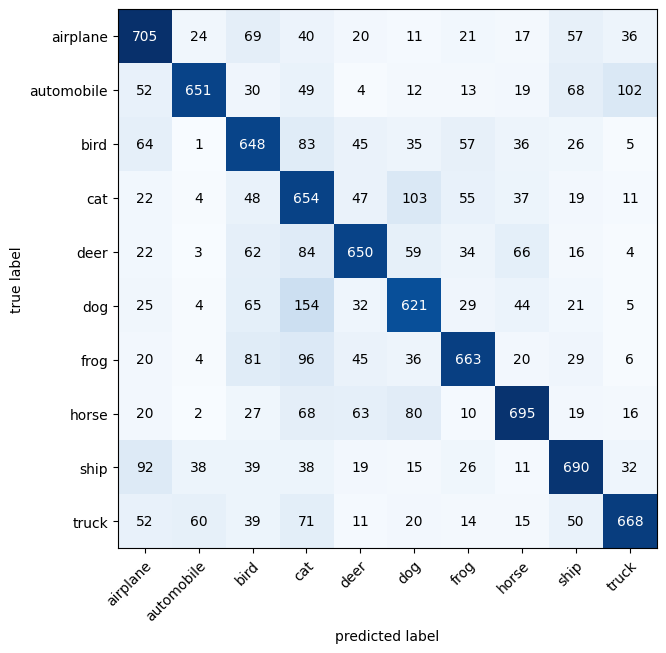

In [ ]:

## Training for Dropout=0.2 150 epochs 0.05lr

from torch.optim.lr_scheduler import LambdaLR

device="cuda" if torch.cuda.is_available() else "cpu" #device
loss_fn=nn.CrossEntropyLoss() #Loss Function


model_nodropout1=FullNetwork(p=0.2) # Network instantiation
optimizer1=torch.optim.SGD(params=model_nodropout1.parameters(),lr=0.05) #Optimizer
lr_scheduler = torch.optim.lr_scheduler.LinearLR(optimizer1,
                                               start_factor=1.0,end_factor=0.3,total_iters=150) #scheduler

def training(model:torch.nn.Module,data_loader:DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer, accuracy_fn,device:torch.device=device):
  train_loss,train_acc=0,0
  model.to(device)
  model.train()

  for batch,(X,y) in enumerate(data_loader):
    X,y=X.float().to(device),y.to(device)

    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss=train_loss+loss
    train_acc=train_acc+accuracy_fn(y_target=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    lr_scheduler.step()

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train Loss:{train_loss:5f}|Train Acc:{train_acc:5f}%")
  return train_loss,train_acc


def testing(data_loader:DataLoader,model:torch.nn.Module,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
  test_loss,test_acc=0,0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.float().to(device),y.to(device)

      test_pred=model(X)

      test_loss=test_loss+loss_fn(test_pred,y)
      test_acc=test_acc+accuracy_fn(y_target=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

    return test_loss,test_acc


#Training Loop

from tqdm.auto import tqdm
import torch

train_loss_list=[]
train_acc_list=[]
test_loss_list=[]
test_acc_list=[]

epochs=150 #epochs

start_timer=timer()
for epoch in tqdm(range(epochs)):
  train_loss,train_acc=training(data_loader=train_data_loader,model=model_nodropout1,loss_fn=loss_fn,optimizer=optimizer1,accuracy_fn=accuracy_fn)
  test_loss,test_acc=testing(data_loader=test_data_loader,model=model_nodropout1,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
  print(f"Epoch:{epoch}")

from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="test_save_with scheduler__dropout_0p2_11292023_0p05lr_150epochs.pth" #modelname
model_save_path=model_path/model_name
# Create model save


torch.save(model_nodropout1.state_dict(),f=model_save_path)
model_nodropout1.state_dict()

end_timer=timer()
print_train_time(start=start_timer,end=end_timer,device=device)


#Load testing

model_load=FullNetwork(p=0.2) #Model loading
model_load.load_state_dict(torch.load(f=model_save_path))
#model_load.state_dict()

test_loss,test_acc=testing(data_loader=test_data_loader,model=model_load,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

import mlxtend
mlxtend.__version__
from tqdm.auto import tqdm
y_targets=[]
y_preds=[]
model_load.eval()
with torch.inference_mode():
  for (X,y) in tqdm(test_data_loader):
    X,y= X.float().to(device),y.to(device)
    test_pred=model_load(X)
    y_pred=torch.softmax(test_pred.squeeze(),dim=0).argmax(dim=1)

    y_targets.append(y.cpu())
    y_preds.append(y_pred.cpu())

y_preds_tensor=torch.cat(y_preds)
y_targets_tensor=torch.cat(y_targets)
y_targets[:10]

import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat= ConfusionMatrix(num_classes=len(classes),task='multiclass')
confmat_tensor=confmat(preds=y_preds_tensor,target=y_targets_tensor)


fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=classes,figsize=(10,7))




In [ ]:
confmat_tensor

tensor([[705,  24,  69,  40,  20,  11,  21,  17,  57,  36],
        [ 52, 651,  30,  49,   4,  12,  13,  19,  68, 102],
        [ 64,   1, 648,  83,  45,  35,  57,  36,  26,   5],
        [ 22,   4,  48, 654,  47, 103,  55,  37,  19,  11],
        [ 22,   3,  62,  84, 650,  59,  34,  66,  16,   4],
        [ 25,   4,  65, 154,  32, 621,  29,  44,  21,   5],
        [ 20,   4,  81,  96,  45,  36, 663,  20,  29,   6],
        [ 20,   2,  27,  68,  63,  80,  10, 695,  19,  16],
        [ 92,  38,  39,  38,  19,  15,  26,  11, 690,  32],
        [ 52,  60,  39,  71,  11,  20,  14,  15,  50, 668]])

In [ ]:
def testing(data_loader:DataLoader,model:torch.nn.Module,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
  test_loss,test_acc=0,0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.float().to(device),y.to(device)

      test_pred=model(X)

      test_loss=test_loss+loss_fn(test_pred,y)
      test_acc=test_acc+accuracy_fn(y_target=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

    return test_loss,test_acc

Test loss: 4.59899 | Test accuracy: 10.00%



  0%|          | 0/625 [00:00<?, ?it/s]

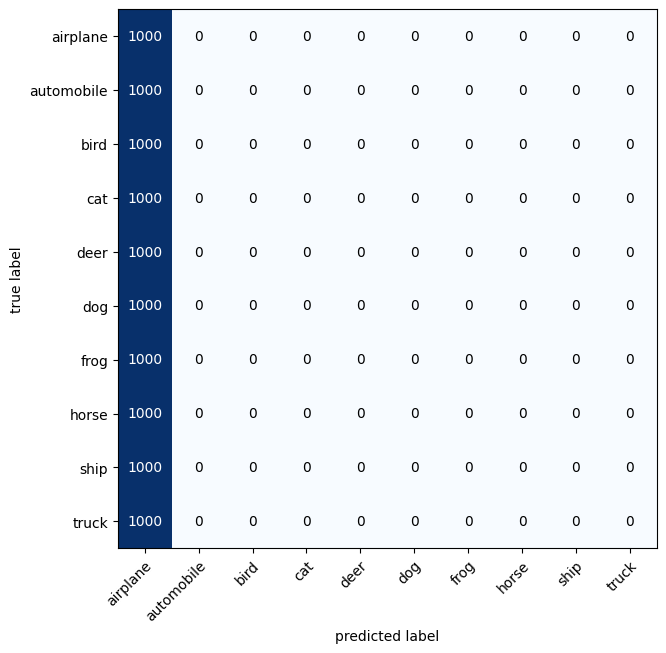

In [ ]:
# Confusion Matrix Generation
from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="test_save_with scheduler__dropout_0p9_11262023.pth" #modelname
model_save_path=model_path/model_name
#Load testing

model_load=FullNetwork(p=0.9) #Model loading
model_load.load_state_dict(torch.load(f=model_save_path))
#model_load.state_dict()
loss_fn=nn.CrossEntropyLoss() #Loss Function
test_loss,test_acc=testing(data_loader=test_data_loader,model=model_load,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

import mlxtend
mlxtend.__version__
from tqdm.auto import tqdm
y_targets=[]
y_preds=[]
model_load.eval()
with torch.inference_mode():
  for (X,y) in tqdm(test_data_loader):
    X,y= X.float().to(device),y.to(device)
    test_pred=model_load(X)
    y_pred=torch.softmax(test_pred.squeeze(),dim=0).argmax(dim=1)

    y_targets.append(y.cpu())
    y_preds.append(y_pred.cpu())

y_preds_tensor=torch.cat(y_preds)
y_targets_tensor=torch.cat(y_targets)
y_targets[:10]

import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat= ConfusionMatrix(num_classes=len(classes),task='multiclass')
confmat_tensor=confmat(preds=y_preds_tensor,target=y_targets_tensor)


fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=classes,figsize=(10,7))

In [ ]:
confmat_tensor

tensor([[530,  50, 128,  18,  32,  10,  31,  32, 130,  39],
        [141, 505,  11,   5,   9,   7,  12,  24,  42, 244],
        [ 61,  19, 395,  43, 117, 126, 136,  68,  29,   6],
        [ 16,  68,  53, 201,  62, 320, 169,  50,  24,  37],
        [  9,   9,  38,  34, 560,  82,  86, 131,  38,  13],
        [ 11,  17,  42,  88,  48, 632,  30,  99,  11,  22],
        [  3,  19,  28,  55,  59,  63, 749,  11,   3,  10],
        [ 13,  12,  42,   9,  68,  82,  16, 683,  28,  47],
        [120, 130,  30,   3,  24,   7,  36,   3, 624,  23],
        [ 38,  56,   5,   4,  15,   0,  10,  15,  74, 783]])

In [ ]:
#Load testing
from pathlib import Path

model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="test_save_with_scheduler_old.pth"
model_save_path=model_path/model_name
#model_name="test_save1.pth"
model_save_path=model_path/model_name
model_load=FullNetwork(p=0)
model_load.load_state_dict(torch.load(f=model_save_path))
#model_load.state_dict()

test_loss,test_acc=testing(data_loader=test_data_loader,model=model_load,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

In [ ]:
from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="test_save_with scheduler__dropout_0p9_11262023.pth" #modelname
model_save_path=model_path/model_name

import mlxtend
mlxtend.__version__
from tqdm.auto import tqdm
y_targets=[]
y_preds=[]
model_load.eval()
with torch.inference_mode():
  for (X,y) in tqdm(test_data_loader):
    X,y= X.float().to(device),y.to(device)
    test_pred=model_load(X)
    y_pred=torch.softmax(test_pred.squeeze(),dim=0).argmax(dim=1)

    y_targets.append(y_target.cpu())
    y_preds.append(y_pred.cpu())

y_preds_tensor=torch.cat(y_preds)
y_targets_tensor=torch.cat(y_targets)
y_targets[:10]

import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat= ConfusionMatrix(num_classes=len(classes),task='multiclass')
confmat_tensor=confmat(preds=y_preds_tensor,target=y_targets_tensor)


fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=classes,figsize=(10,7))


In [ ]:
y_preds[1],y_targets[1]